# Intro

In [109]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import sklearn
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
import matplotlib.patches as mpatches
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from itertools import combinations
from sklearn.model_selection import KFold

# Suppress Warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [110]:
data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [111]:
#checking the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [112]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [113]:
#changing basement to int to prevent future issues
data['sqft_basement'] = data['sqft_basement'].astype(str)
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce')

In [114]:
#changing missing values for waterfront and sqft basement properties to zero
data['waterfront'] = data['waterfront'].fillna(0.0)
data['sqft_basement'] = data['sqft_basement'].fillna(0.0)

In [115]:
#dropping columns that I won't be using
data.drop('lat', axis='columns', inplace=True)
data.drop('long', axis='columns', inplace=True)
data.drop('date', axis='columns', inplace=True)
data.drop('view', axis='columns', inplace=True)
data.drop('sqft_lot15', axis='columns', inplace=True)
data.drop('sqft_living15', axis='columns', inplace=True)
data.drop('zipcode', axis='columns', inplace=True)
data.drop('yr_renovated', axis='columns', inplace=True)
data.drop('sqft_above', axis='columns', inplace=True)
data.drop('id', axis='columns', inplace=True)

In [116]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987


In [117]:
#Renaming columns 
#data = data.rename(columns = {'price': 'Price', 'bedrooms': 'Bedrooms', 'bathrooms': 'Bathrooms', 'sqft_living': 'Square Footage of House', 'sqft_lot': 'Square Footage of Lot', 'floors': 'Floors', 'waterfront': 'Waterfront', 'condition': "Condition", 'grade': 'Grade', 'sqft_basement': 'Square Footage of Basement', 'yr_built': 'Year Built'}, inplace = False)

In [118]:
#dropping outliers here; so far just the 33 bedrooms row
data = data[data['bedrooms'] <= 12]
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,3.409752,7.657946,285.702954,1971.000787
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.650471,1.173218,439.825454,29.375460
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,0.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,0.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,3.000000,7.000000,0.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,4.000000,8.000000,550.000000,1997.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,4820.000000,2015.000000


Will probably refine the limitations later on if the code is working good

# Correlations

In [119]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.036031,0.667964,0.321103,0.053965
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.023440,0.366174,0.303517,0.160736
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,-0.126443,0.665834,0.278504,0.507166
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,-0.059397,0.762776,0.428683,0.318140
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,-0.008806,0.114726,0.015038,0.052939
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,-0.264013,0.458783,-0.241845,0.489175
waterfront,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.016659,0.082817,0.083053,-0.024491
condition,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,1.000000,-0.146854,0.168431,-0.361555
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,-0.146854,1.000000,0.165863,0.447854
sqft_basement,0.321103,0.303517,0.278504,0.428683,0.015038,-0.241845,0.083053,0.168431,0.165863,1.000000,-0.130063


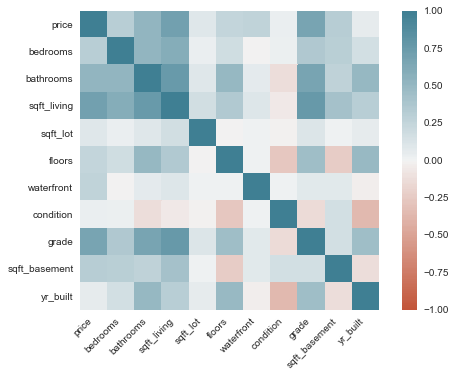

In [120]:
#using heatmap to show these correlations and checking multilinearity
import seaborn as sns
corr = data.corr()
axes = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right');

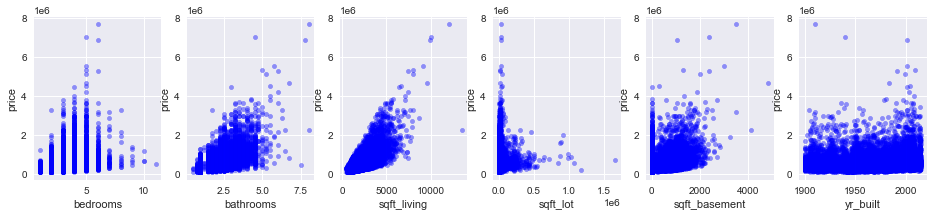

In [121]:
#doing graphs for all columns against price that are continuous;
#checking for linearity
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'floors'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

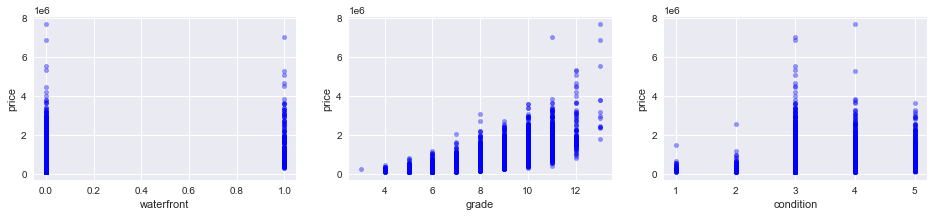

In [122]:
#doing graphs for all columns against price that are categorical;
#checking for linearity
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['waterfront', 'grade', 'condition'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

# Modeling

In [123]:
#Doing the statsmodel and sklearn seperately to see how coding going later on
y = data[['price']]
x = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'waterfront', 'grade', 'condition']]

In [124]:
#statsmodel
formula = 'price ~ bedrooms+bathrooms+sqft_living+sqft_lot+sqft_basement+yr_built+waterfront+grade+condition'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     4374.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:01:05   Log-Likelihood:            -2.9617e+05
No. Observations:               21596   AIC:                         5.924e+05
Df Residuals:                   21586   BIC:                         5.924e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.528e+06    1.3e+05     50.103      0.000    6.27e+06    6.78e+06
bedrooms      -4.712e+04   2133.537    -22.083      0.000   -5.13e+04   -4.29e+04
bathrooms      5.673e+04   3366.238     16.853      0.000    5.01e+04    6.33e+04
sqft_living     176.3193      3.541     49.800      0.000     169.380     183.259
sqft_lot         -0.2586      0.037     -7.025      0.000      -0.331      -0.186
sqft_basement     5.7724      4.065      1.420      0.156      -2.195      13.740
yr_built      -3747.8246     66.686    -56.201      0.000   -3878.533   -3617.116
waterfront     7.517e+05   1.84e+04     40.921      0.000    7.16e+05    7.88e+05
grade          1.322e+05   2166.910     60.993      0.000    1.28e+05    1.36e+05
condition      1.658e+04   2480.155      6.685      0.000    1.17e+04    2.14e+04
==============================================================================
Omnibus:                    15666.395   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           974198.525
Skew:                           2.890   Prob(JB):                         0.00
Kurtosis:                      35.392   Cond. No.                     3.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Basement category seems to be the only one so far with a high p value but let's see what we can to do to change that as well as perhaps get a better R squared.

In [125]:
#sklearn
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))
    
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.6496760114697868
Test R2:  0.6296626890641803
Train RMSE:  217912.8765247984
Test RMSE:  221583.0167339947


Both test and train data for r squared and RMSE seem relatively close, but again, let's see what we can do to get better results.

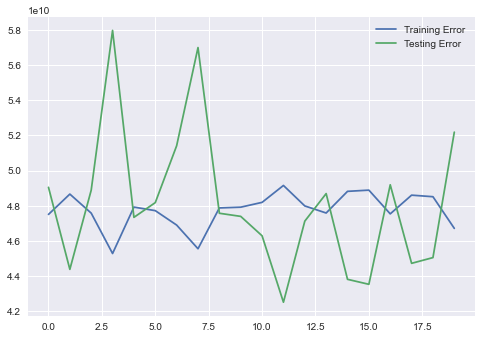

In [126]:
#cross validation of model before transformations
linreg = LinearRegression()

num = 20 
train_err = []
test_err = []
for i in range(num):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    linreg.fit(x_train, y_train)
    y_hat_train = linreg.predict(x_train)
    
    y_hat_test = linreg.predict(x_test)
    
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
    
plt.plot(list(range(num)), train_err, label='Training Error')
plt.plot(list(range(num)), test_err, label='Testing Error')
plt.legend();

Talk about the fit of the model here; seems overfitted 

<ipython-input-127-1210a0649fad>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


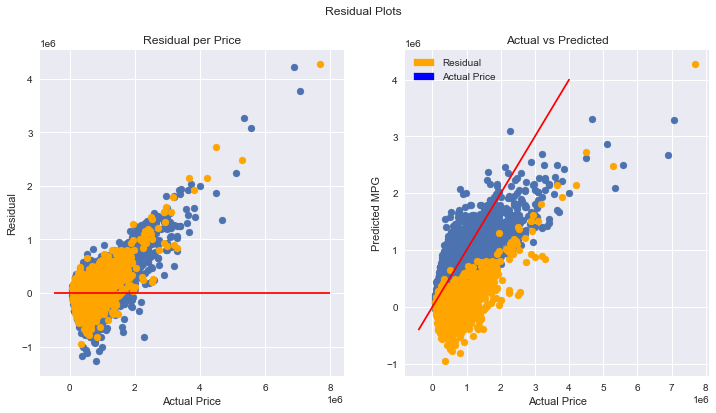

In [127]:
#check homoscedasticity and normalization of untransformed data; want equal variance throughout
#add a legend to each plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(y_train, y_train-y_hat_train)
axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
axes[0].set(xlabel='Actual Price', ylabel='Residual', title='Residual per Price')
axes[0].hlines(0, xmin=-500000, xmax=8000000, colors='red')

axes[1].scatter(y_train, y_hat_train)
axes[1].scatter(y_test, y_test-y_hat_test, color='orange')
axes[1].plot([-400000, 4000000], [-400000, 4000000], color='red', linestyle='-')
axes[1].set(xlabel='Actual Price', ylabel='Predicted MPG', title='Actual vs Predicted')

orange_patch = mpatches.Patch(color='orange', label='Residual')
blue_patch = mpatches.Patch(color='blue', label='Actual Price')

plt.legend(handles=[orange_patch, blue_patch])

fig.show()

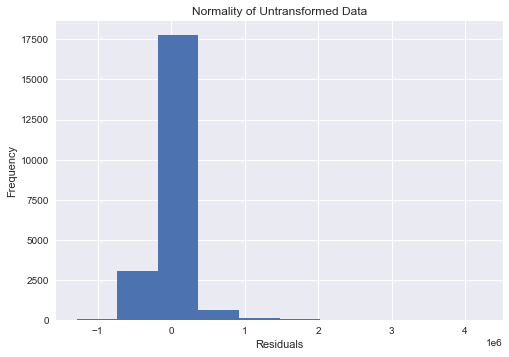

In [128]:
#normality check
plt.hist(model.resid)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Untransformed Data');

# Transformations

First is will be log transforming everything but basement, waterfront, condition and grade; second will be get dummies for categorical columns; Third will be checking interactions (potentially merging them or getting rid of one of them); Fifth will be to remove any outliers (looking at you bedrooms!)

In [129]:
#logging price to see if it makes a difference in model
data['loggedprice'] = np.log(data['price'])
formula = 'loggedprice ~ bedrooms+bathrooms+sqft_living+sqft_lot+sqft_basement+yr_built+waterfront+grade+condition'
model = ols(formula=formula, data=data).fit()
model.summary()

<ipython-input-129-3819063816e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loggedprice'] = np.log(data['price'])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loggedprice   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4209.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:01:07   Log-Likelihood:                -5848.5
No. Observations:               21596   AIC:                         1.172e+04
Df Residuals:                   21586   BIC:                         1.180e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        21.1860      0.189    112.062      0.000      20.815      21.557
bedrooms         -0.0319      0.003    -10.299      0.000      -0.038      -0.026
bathrooms         0.1077      0.005     22.057      0.000       0.098       0.117
sqft_living       0.0002   5.14e-06     31.356      0.000       0.000       0.000
sqft_lot      -1.016e-07   5.34e-08     -1.902      0.057   -2.06e-07    3.12e-09
sqft_basement  2.938e-05    5.9e-06      4.981      0.000    1.78e-05    4.09e-05
yr_built         -0.0054   9.68e-05    -55.360      0.000      -0.006      -0.005
waterfront        0.4948      0.027     18.563      0.000       0.443       0.547
grade             0.2402      0.003     76.399      0.000       0.234       0.246
condition         0.0338      0.004      9.398      0.000       0.027       0.041
==============================================================================
Omnibus:                      104.431   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.982
Skew:                          -0.127   Prob(JB):                     3.96e-26
Kurtosis:                       3.257   Cond. No.                     3.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))
    
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.6468872356755805
Test R2:  0.6412014010128562
Train RMSE:  217590.45043596628
Test RMSE:  222894.553830209


R squared got a little worse but the only high p value (lot) went down. Also test and train for both r squared & rmse got closer together in value

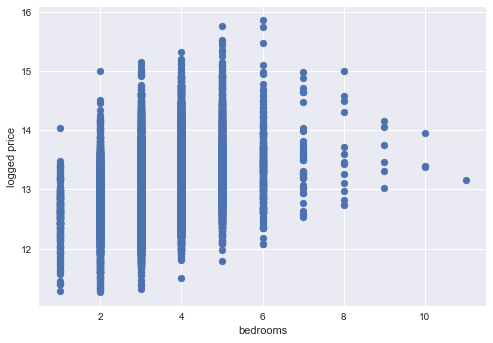

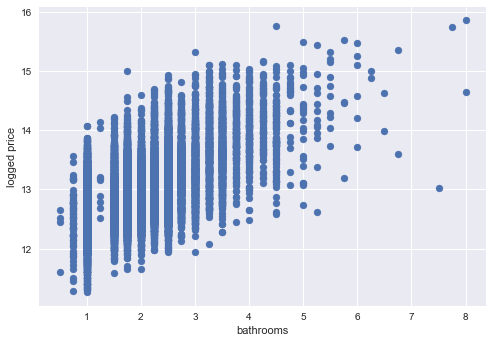

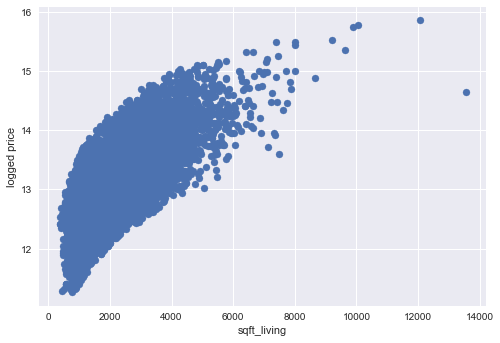

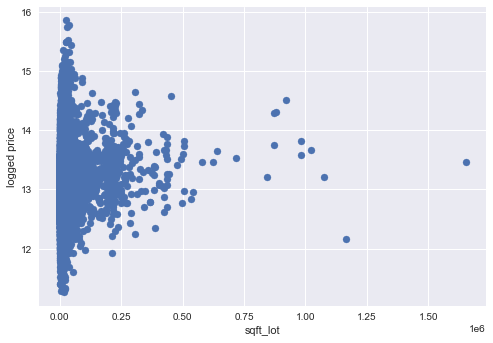

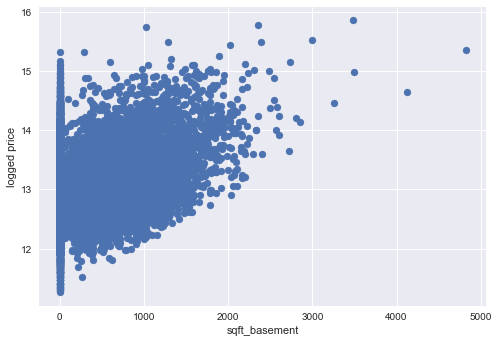

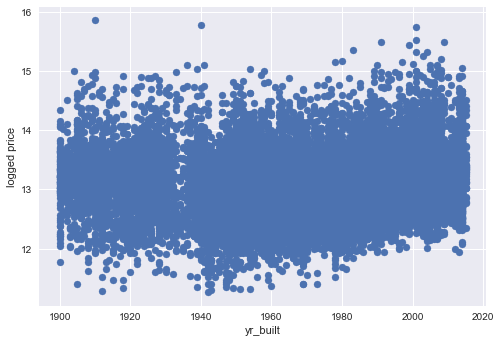

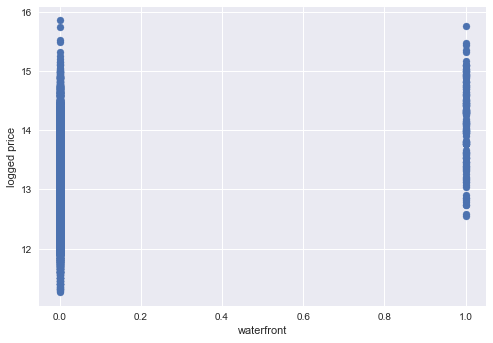

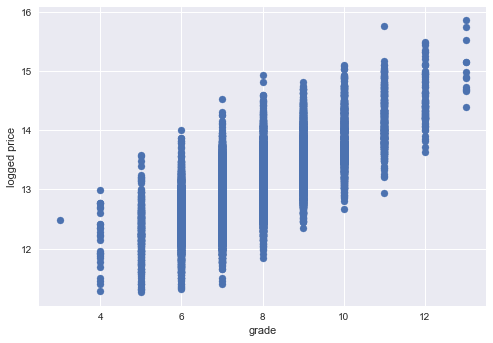

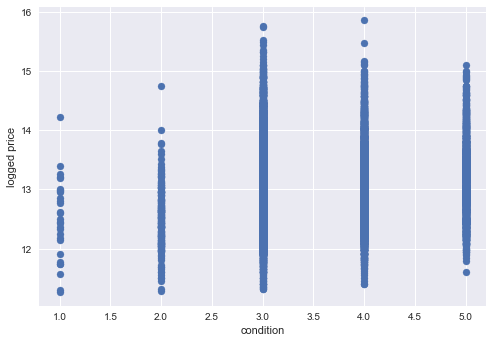

In [131]:
for col in x.columns:
    fig = plt.figure
    ax = plt.gca()
    ax.scatter(x[col], np.log(y))
    
    ax.set_xlabel(col)
    ax.set_ylabel('logged price')
    
    plt.show()

graphs look better after logging price; can see a little more of a clear relationship between variables except for year built

In [132]:
#going to log almost all other variables as well to see if that helps 

data['logbeds'] = np.log(data['bedrooms'])
data['logbaths'] = np.log(data['bathrooms'])
data['logliving'] = np.log(data['sqft_living'])
data['loglot'] = np.log(data['sqft_lot'])
data['logfloors'] = np.log(data['floors'])
data['logyear'] = np.log(data['yr_built'])

<ipython-input-132-38c3efb85d47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['logbeds'] = np.log(data['bedrooms'])
<ipython-input-132-38c3efb85d47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['logbaths'] = np.log(data['bathrooms'])
<ipython-input-132-38c3efb85d47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [133]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,loggedprice,logbeds,logbaths,logliving,loglot,logfloors,logyear
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,7.578145
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,7.576097
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,12.100712,0.693147,0.000000,6.646391,9.210340,0.000000,7.566828
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,7.583248
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,7.594381


In [134]:
formula = 'loggedprice ~ logbeds+logbaths+logliving+loglot+logfloors+logyear+sqft_basement+waterfront+grade+condition'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loggedprice   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3952.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:01:09   Log-Likelihood:                -5555.3
No. Observations:               21596   AIC:                         1.113e+04
Df Residuals:                   21585   BIC:                         1.122e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        93.2676      1.457     64.002      0.000      90.411      96.124
logbeds          -0.1619      0.010    -15.772      0.000      -0.182      -0.142
logbaths          0.1126      0.010     11.383      0.000       0.093       0.132
logliving         0.4352      0.012     35.507      0.000       0.411       0.459
loglot           -0.0386      0.003    -13.412      0.000      -0.044      -0.033
logfloors         0.0999      0.009     10.912      0.000       0.082       0.118
logyear         -11.2137      0.191    -58.604      0.000     -11.589     -10.839
sqft_basement  5.597e-05   6.63e-06      8.441      0.000     4.3e-05     6.9e-05
waterfront        0.5451      0.026     20.715      0.000       0.494       0.597
grade             0.2412      0.003     81.144      0.000       0.235       0.247
condition         0.0366      0.004     10.219      0.000       0.030       0.044
==============================================================================
Omnibus:                       77.042   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.501
Skew:                          -0.027   Prob(JB):                     5.52e-23
Kurtosis:                       3.333   Cond. No.                     3.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))
    
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.6435563040433216
Test R2:  0.6534539067879861
Train RMSE:  217144.52562726903
Test RMSE:  224611.0185841178


Talk about how log transformed almost everything except waterfront, grade and condition (since they are categorical) and also not basement since it was throwing off the model.

However, after logging everything else, did see improvement for p values (all are now zero), r squared went up a little and train/test for both r squared and rmse got closer together in value 

# Dummy Variables

In [136]:
#treating grade and condition as categorical and getting dummies for them
#didn't do waterfront since it didnt really seem to anything (maybe cause either it has a waterfront or it doesnt)
grade_dummies = pd.get_dummies(data['grade'], prefix='grde', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix='con', drop_first=True)
data = pd.concat([data, grade_dummies, condition_dummies], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,...,grde_8,grde_9,grde_10,grde_11,grde_12,grde_13,con_2,con_3,con_4,con_5
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,...,1,0,0,0,0,0,0,1,0,0


In [137]:
#train test split AFTER get dummies
formula = 'loggedprice ~ logbeds+logbaths+logliving+loglot+logfloors+logyear+sqft_basement+waterfront+con_2+con_3+con_4+con_5+grde_4+grde_5+grde_6+grde_7+grde_8+grde_9+grde_10+grde_11+grde_12'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loggedprice   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1890.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:01:09   Log-Likelihood:                -5520.1
No. Observations:               21596   AIC:                         1.108e+04
Df Residuals:                   21574   BIC:                         1.126e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        96.3683      1.482     65.012      0.000      93.463      99.274
logbeds          -0.1529      0.010    -14.785      0.000      -0.173      -0.133
logbaths          0.1155      0.010     11.571      0.000       0.096       0.135
logliving         0.4341      0.012     35.372      0.000       0.410       0.458
loglot           -0.0401      0.003    -13.670      0.000      -0.046      -0.034
logfloors         0.0910      0.009      9.840      0.000       0.073       0.109
logyear         -11.2166      0.194    -57.689      0.000     -11.598     -10.836
sqft_basement  5.593e-05   6.64e-06      8.418      0.000    4.29e-05     6.9e-05
waterfront        0.5453      0.026     20.690      0.000       0.494       0.597
con_2            -0.0221      0.063     -0.351      0.725      -0.146       0.101
con_3             0.1246      0.059      2.126      0.034       0.010       0.239
con_4             0.1461      0.059      2.492      0.013       0.031       0.261
con_5             0.2027      0.059      3.439      0.001       0.087       0.318
grde_4           -1.7908      0.104    -17.141      0.000      -1.996      -1.586
grde_5           -1.7881      0.087    -20.485      0.000      -1.959      -1.617
grde_6           -1.6196      0.085    -19.062      0.000      -1.786      -1.453
grde_7           -1.3923      0.084    -16.504      0.000      -1.558      -1.227
grde_8           -1.1574      0.084    -13.757      0.000      -1.322      -0.993
grde_9           -0.8830      0.084    -10.501      0.000      -1.048      -0.718
grde_10          -0.6606      0.084     -7.839      0.000      -0.826      -0.495
grde_11          -0.4309      0.085     -5.061      0.000      -0.598      -0.264
grde_12          -0.1840      0.090     -2.045      0.041      -0.360      -0.008
==============================================================================
Omnibus:                       80.669   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.075
Skew:                          -0.042   Prob(JB):                     9.25e-24
Kurtosis:                       3.333   Cond. No.                     3.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))
    
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.6446009956048533
Test R2:  0.6507954003706015
Train RMSE:  219477.56855999323
Test RMSE:  215202.77985149238


r squared went up a little but some have p values (one thats super high) so going to drop all p values above zero and rmse didnt really change

In [139]:
formula = 'loggedprice ~ logbeds+logbaths+logliving+loglot+logfloors+logyear+sqft_basement+waterfront+con_4+con_5+grde_4+grde_5+grde_6+grde_7+grde_8+grde_9+grde_10+grde_11'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loggedprice   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2199.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:01:09   Log-Likelihood:                -5542.2
No. Observations:               21596   AIC:                         1.112e+04
Df Residuals:                   21577   BIC:                         1.127e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        95.8837      1.481     64.725      0.000      92.980      98.787
logbeds          -0.1528      0.010    -14.765      0.000      -0.173      -0.133
logbaths          0.1154      0.010     11.547      0.000       0.096       0.135
logliving         0.4358      0.012     35.495      0.000       0.412       0.460
loglot           -0.0413      0.003    -14.070      0.000      -0.047      -0.036
logfloors         0.0910      0.009      9.835      0.000       0.073       0.109
logyear         -11.1579      0.194    -57.435      0.000     -11.539     -10.777
sqft_basement  5.591e-05   6.65e-06      8.409      0.000    4.29e-05    6.89e-05
waterfront        0.5431      0.026     20.598      0.000       0.491       0.595
con_4             0.0248      0.005      4.685      0.000       0.014       0.035
con_5             0.0817      0.009      9.560      0.000       0.065       0.098
grde_4           -1.6549      0.070    -23.723      0.000      -1.792      -1.518
grde_5           -1.6407      0.040    -41.427      0.000      -1.718      -1.563
grde_6           -1.4641      0.034    -42.730      0.000      -1.531      -1.397
grde_7           -1.2343      0.033    -37.696      0.000      -1.298      -1.170
grde_8           -0.9991      0.032    -31.067      0.000      -1.062      -0.936
grde_9           -0.7245      0.032    -22.626      0.000      -0.787      -0.662
grde_10          -0.5021      0.032    -15.449      0.000      -0.566      -0.438
grde_11          -0.2721      0.035     -7.846      0.000      -0.340      -0.204
==============================================================================
Omnibus:                       79.071   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.576
Skew:                          -0.048   Prob(JB):                     5.32e-23
Kurtosis:                       3.324   Cond. No.                     3.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))
    
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.6423745367375577
Test R2:  0.6608947527776143
Train RMSE:  222427.01698393913
Test RMSE:  202923.2423251711


r squared went down minimally but now p values are all zero so good move and closer values for linear regression model outcome

# Interactions

In [141]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,...,grde_8,grde_9,grde_10,grde_11,grde_12,grde_13,con_2,con_3,con_4,con_5
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,...,1,0,0,0,0,0,0,1,0,0


In [142]:
regression_1 = LinearRegression()
regression_2 = LinearRegression()

bedshaped = data['bedrooms'].values.reshape(-1, 1)
bathshaped = data['bathrooms'].values.reshape(-1, 1)

regression_1.fit(bedshaped, data['loggedprice'])
regression_2.fit(bathshaped, data['loggedprice'])

#making predictions using test set
pred_1 = regression_1.predict(bedshaped)
pred_2 = regression_2.predict(bathshaped)

#coefficiants
print(regression_1.coef_)
print(regression_2.coef_)

[0.20435007]
[0.377476]


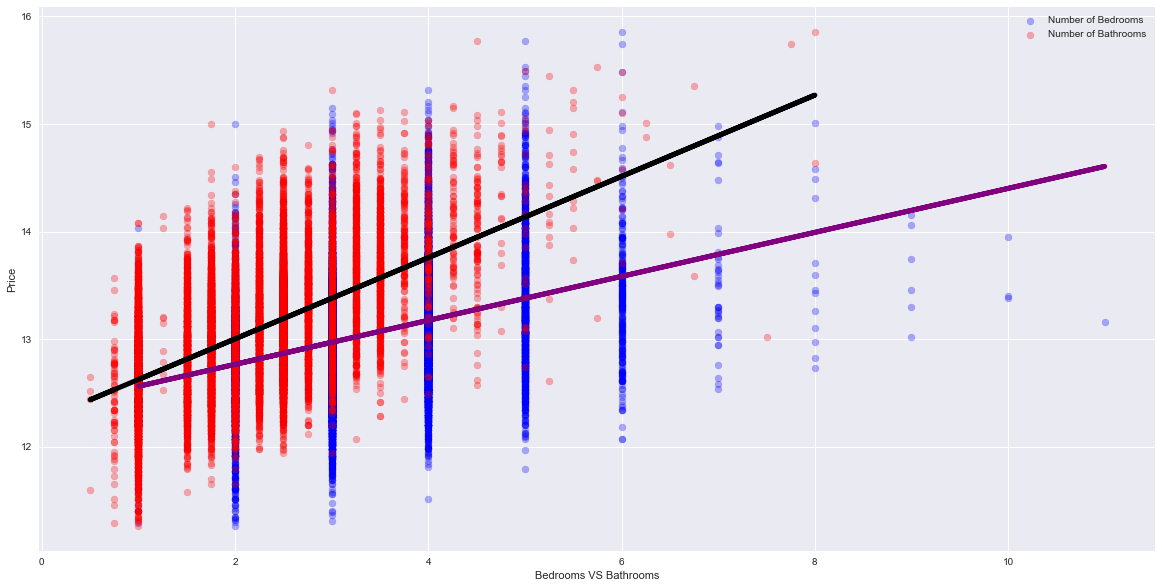

In [143]:
#plotting the outputs to get a better look
plt.figure(figsize=(20,10))

plt.scatter(bedshaped, data['loggedprice'], color='blue', alpha = 0.3, label = 'Number of Bedrooms')
plt.scatter(bathshaped, data['loggedprice'], color='red', alpha = 0.3, label = 'Number of Bathrooms')

plt.plot(bedshaped, pred_1, color='purple', linewidth=5)
plt.plot(bathshaped, pred_2, color='black', linewidth=5)

plt.ylabel('Price')
plt.xlabel('Bedrooms VS Bathrooms')
plt.legend();

In [144]:
#baseline without the interaction 
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, x, y, scoring='r2', cv=crossvalidation))
baseline

0.6418937444973759

In [145]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

x_interact_2 = x.copy()
x_interact_2['bedandbath'] = x['bedrooms'] * x['bathrooms']

interact_origin = np.mean(cross_val_score(regression, x_interact_2, y, scoring='r2', cv=crossvalidation))
interact_origin

0.648615884080508

In [146]:
x_interact_2 = sm.add_constant(x_interact_2)
model = sm.OLS(y,x_interact_2)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     4056.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:01:10   Log-Likelihood:            -2.9596e+05
No. Observations:               21596   AIC:                         5.919e+05
Df Residuals:                   21585   BIC:                         5.920e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.256e+06    1.3e+05     48.228      0.000       6e+06    6.51e+06
bedrooms      -1.192e+05   4090.922    -29.145      0.000   -1.27e+05   -1.11e+05
bathrooms     -6.975e+04   6990.169     -9.979      0.000   -8.35e+04   -5.61e+04
sqft_living     164.4695      3.553     46.287      0.000     157.505     171.434
sqft_lot         -0.2506      0.036     -6.874      0.000      -0.322      -0.179
sqft_basement     9.5265      4.030      2.364      0.018       1.628      17.425
yr_built      -3501.3139     67.119    -52.166      0.000   -3632.872   -3369.756
waterfront     7.508e+05   1.82e+04     41.269      0.000    7.15e+05    7.86e+05
grade           1.38e+05   2164.532     63.748      0.000    1.34e+05    1.42e+05
condition      2.065e+04   2464.157      8.380      0.000    1.58e+04    2.55e+04
bedandbath     3.496e+04   1698.133     20.587      0.000    3.16e+04    3.83e+04
==============================================================================
Omnibus:                    14357.259   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           720798.744
Skew:                           2.584   Prob(JB):                         0.00
Kurtosis:                      30.827   Cond. No.                     3.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Talk about interaction between bed and bath. Trying other pairs next.

In [147]:
regression_1 = LinearRegression()
regression_2 = LinearRegression()

gradeshaped = data['grade'].values.reshape(-1, 1)
livingshaped = data['sqft_living'].values.reshape(-1, 1)

regression_1.fit(gradeshaped, data['loggedprice'])
regression_2.fit(livingshaped, data['loggedprice'])

#making predictions using test set
pred_1 = regression_1.predict(gradeshaped)
pred_2 = regression_2.predict(livingshaped)

#coefficiants
print(regression_1.coef_)
print(regression_2.coef_)

[0.31585511]
[0.00039872]


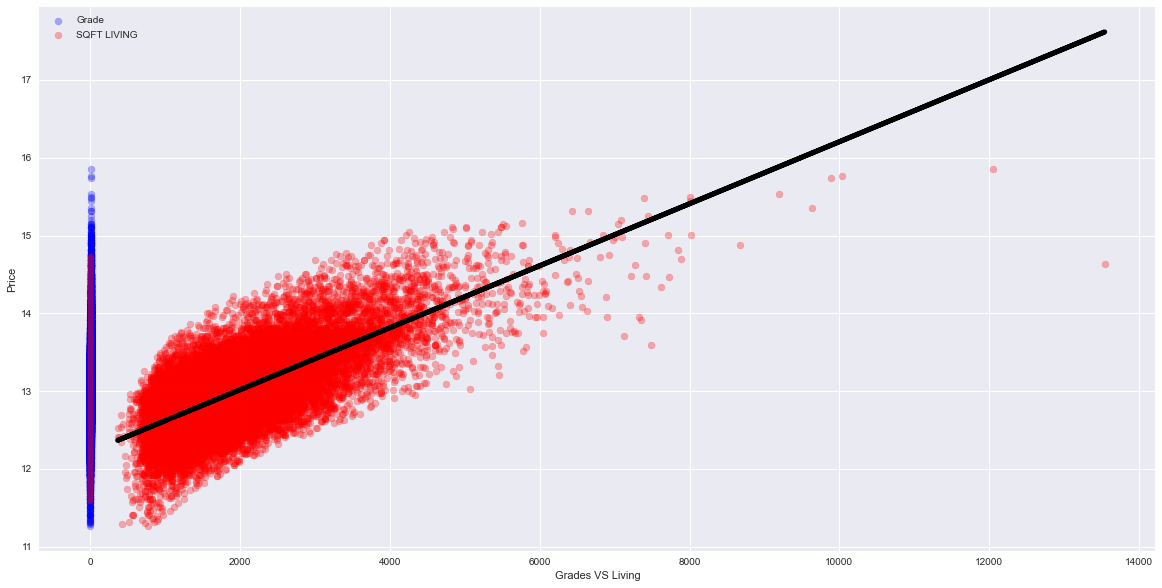

In [148]:
#plotting the outputs to get a better look
plt.figure(figsize=(20,10))

plt.scatter(gradeshaped, data['loggedprice'], color='blue', alpha = 0.3, label = 'Grade')
plt.scatter(livingshaped, data['loggedprice'], color='red', alpha = 0.3, label = 'SQFT LIVING')

plt.plot(gradeshaped, pred_1, color='purple', linewidth=5)
plt.plot(livingshaped, pred_2, color='black', linewidth=5)

plt.ylabel('Price')
plt.xlabel('Grades VS Living')
plt.legend();

In [149]:
#baseline without the interaction 
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, x, y, scoring='r2', cv=crossvalidation))
baseline

0.6418937444973759

In [150]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

x_interact_2 = x.copy()
x_interact_2['gradeandliving'] = x['grade'] * x['sqft_living']

interact_origin = np.mean(cross_val_score(regression, x_interact_2, y, scoring='r2', cv=crossvalidation))
interact_origin

0.6773538523763817

In [151]:
x_interact_2 = sm.add_constant(x_interact_2)
model = sm.OLS(y,x_interact_2)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     4648.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:01:11   Log-Likelihood:            -2.9498e+05
No. Observations:               21596   AIC:                         5.900e+05
Df Residuals:                   21585   BIC:                         5.901e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.262e+06   1.23e+05     50.739      0.000    6.02e+06     6.5e+06
bedrooms       -2.003e+04   2089.911     -9.586      0.000   -2.41e+04   -1.59e+04
bathrooms       6.856e+04   3194.294     21.464      0.000    6.23e+04    7.48e+04
sqft_living     -263.9687      9.391    -28.109      0.000    -282.376    -245.562
sqft_lot          -0.2917      0.035     -8.371      0.000      -0.360      -0.223
sqft_basement     28.9503      3.874      7.472      0.000      21.357      36.544
yr_built       -3219.2419     63.980    -50.317      0.000   -3344.647   -3093.837
waterfront      7.083e+05   1.74e+04     40.696      0.000    6.74e+05    7.42e+05
grade           2.939e+04   2898.016     10.143      0.000    2.37e+04    3.51e+04
condition       2.236e+04   2349.882      9.517      0.000    1.78e+04     2.7e+04
gradeandliving    46.8773      0.934     50.187      0.000      45.046      48.708
==============================================================================
Omnibus:                     9928.791   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           245943.252
Skew:                           1.666   Prob(JB):                         0.00
Kurtosis:                      19.193   Cond. No.                     3.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

another interaction between grade and sqft living that improved the model. Talk about the ones done that didnt work: bedxliving, gradexcondition, lotxliving, edxliving, etc and how just because some variables may be correlated, doesn't necessarily mean that they are interacting

# Conclusions